# Pymaceuticals Inc.
---

### Analysis

- There are 249 mice total, most of which showed a decline in tumor volume over time.
- There doesn't seem to be a strong correlation between weight and tumor volume; this correlation was moderate.
- The drugs Capomulin and Ramocane had the lowest variance, meaning they may be the more reliable drugs for desired results.
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(mouse_metadata, study_results, how="left")


# Display the data table for preview
total_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [70]:
# Checking the number of mice.
# 112358 count the number of unique values in a column
number_mice = total_data["Mouse ID"].nunique()
number_mice

249

In [71]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
try_again = total_data[total_data.duplicated(subset=['Mouse ID', 'Tumor Volume (mm3)'], keep=False)]
try_again


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0

In [72]:
# Optional: Get all the data for the duplicate mouse ID. 


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = total_data.drop_duplicates(subset="Mouse ID")
clean_data

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0                 0  
20                  45.0                 0  
30                  45.0                 0  
40                  45.0                 0  
...                  ...               ...  
1858                45.0                 0  
1860                45.0                 0  
1863                45.0                 0  
1873                45.0                 0  
1883                45.0                 0  

[249 rows x 8 columns]

In [74]:
# Checking the number of mice in the clean DataFrame.
cleandata_micecount = len(clean_data["Mouse ID"])
cleandata_micecount

249

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_var = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_sd = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = total_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_dict = {
    "Drug Mean": drug_mean,
    "Drug Median": drug_median,
    "Drug Variance": drug_var,
    "Drug Standard Deviation": drug_sd,
    "Drug SEM": drug_sem
}

drug_df = pd.DataFrame(drug_dict)
drug_df


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Drug Mean  Drug Median  Drug Variance  Drug Standard Deviation  \
Drug Regimen                                                                   
Capomulin     40.675741    41.557809      24.947764                 4.994774   
Ceftamin      52.591172    51.776157      39.290177                 6.268188   
Infubinol     52.884795    51.820584      43.128684                 6.567243   
Ketapril      55.235638    53.698743      68.553577                 8.279709   
Naftisol      54.331565    52.509285      66.173479                 8.134708   
Placebo       54.033581    52.288934      61.168083                 7.821003   
Propriva      52.322552    50.854632      42.351070                 6.507770   
Ramicane      40.216745    40.673236      23.486704                 4.846308   
Stelasyn      54.233149    52.431737      59.450562                 7.710419   
Zoniferol     53.236507    51.818479      48.533355                 6.966589   

              Drug SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

In [76]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

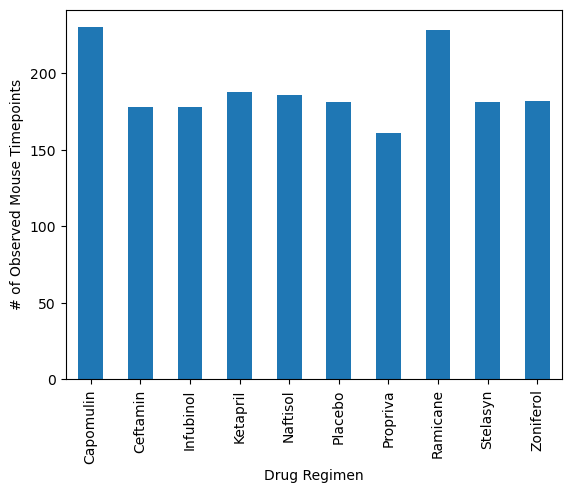

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_time = total_data.groupby('Drug Regimen')['Mouse ID'].count()
plot_drug = total_data['Drug Regimen'].unique()
plot_drug
plot_dict = {
    "Timepoint": plot_time,
    "Drug Regimen": plot_drug
}
plt_df = pd.DataFrame(plot_dict, columns=plot_dict)
# plt_df
# plot_columns = ['Drug Regimen', plot_time]
bar_chart = plt_df['Timepoint'].plot(kind="bar", ylabel='# of Observed Mouse Timepoints')
plt.show()

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


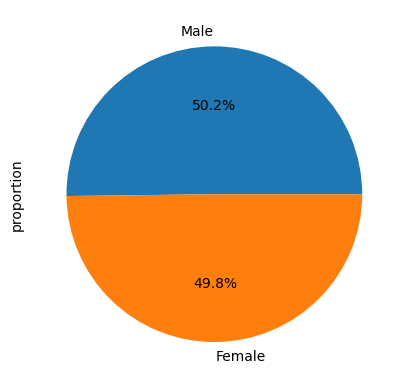

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot_sex = clean_data['Sex'].value_counts('male')
pie_plot = plot_sex.plot(kind="pie", autopct='%1.1f%%')
plt.show()

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = total_data.groupby('Mouse ID').agg({'Timepoint': 'max', 'Drug Regimen': 'first', 'Tumor Volume (mm3)': 'first'}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
first_last_timepoint = pd.merge(greatest_timepoints, clean_data, on='Mouse ID')
select_drugs = first_last_timepoint[first_last_timepoint['Drug Regimen_x'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
select_drugs



Mouse ID  Timepoint_x Drug Regimen_x  Tumor Volume (mm3)_x Drug Regimen_y  \
0       a203           45      Infubinol                  45.0      Infubinol   
1       a251           45      Infubinol                  45.0      Infubinol   
3       a275           45       Ceftamin                  45.0       Ceftamin   
6       a411           45       Ramicane                  45.0       Ramicane   
7       a444           45       Ramicane                  45.0       Ramicane   
..       ...          ...            ...                   ...            ...   
239     y769           45       Ceftamin                  45.0       Ceftamin   
240     y793           45      Capomulin                  45.0      Capomulin   
241     y865           45       Ceftamin                  45.0       Ceftamin   
245     z578           45       Ramicane                  45.0       Ramicane   
246     z581           45      Infubinol                  45.0      Infubinol   

        Sex  Age_months  Weight (g)  Timepoint_y  Tumor Volume (mm3)_y  \
0    Female          20          23            0                  45.0   
1    Female          21          25            0                  45.0   
3    Female          20          28            0                  45.0   
6      Male           3          22            0                  45.0   
7    Female          10          25            0                  45.0   
..      ...         ...         ...          ...                   ...   
239  Female           6          27            0                  45.0   
240    Male          17          17            0                  45.0   
241    Male          23          26            0                  45.0   
245    Male          11          16            0                  45.0   
246  Female          24          25            0                  45.0   

     Metastatic Sites  
0                   0  
1                   0  
3                   0  
6                   0  
7                   0  
..                ...  
239                 0  
240                 0  
241                 0  
245                 0  
246                 0  

[100 rows x 11 columns]

In [82]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile_column = select_drugs['Tumor Volume (mm3)_x']
quartiles = quartile_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The median tumor volume is: {quartiles[.5]}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")

# print("Capomulin's potential outliers: ")
# print("Ramicane's potential outliers: ")
# print("Infubinol's potential outliers: ")
# print("Ceftamin's potential outliers: ")

The lower quartile of tumor volumes is: 45.0
The upper quartile of tumor volumes is: 45.0
The interquartile range of tumor volumes is: 0.0
The median tumor volume is: 45.0
The lower bound is: 45.0
The upper bound is: 45.0


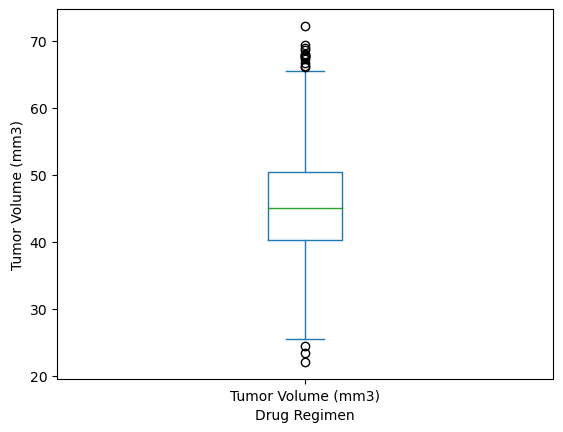

In [83]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = total_data.loc[total_data['Drug Regimen'].isin(four_drugs)]
result = filtered_df['Tumor Volume (mm3)']
# print(result)

box_plot = result.plot(kind="box", xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)')

## Line and Scatter Plots

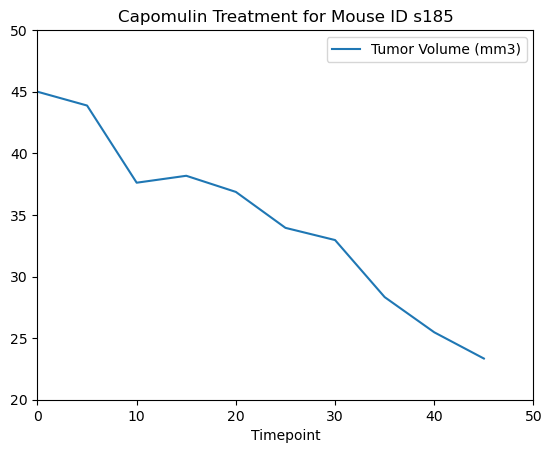

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df = total_data.set_index("Mouse ID")
single_mouse = mouse_df.loc['s185']

single_mouse.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')
plt.title('Capomulin Treatment for Mouse ID s185')
plt.xlim(0,50)
plt.ylim(20,50)
plt.show()


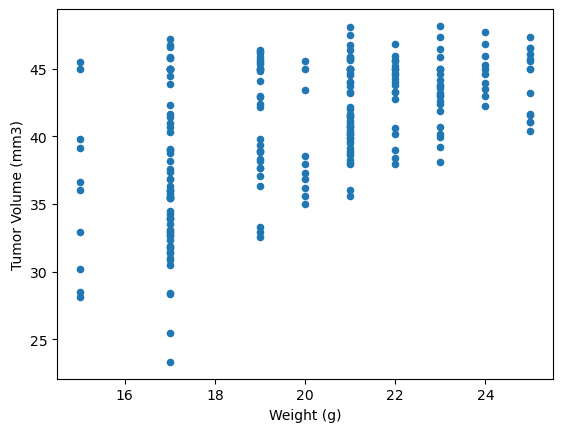

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = total_data.set_index('Drug Regimen')
capomulin_only = capomulin_df.loc['Capomulin']

capomulin_only.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')
plt.show()

## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_only.iloc[:,3]
volume = capomulin_only.iloc[:,5]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

The correlation between weight and tumor volume is 0.53
